# Gradient Descent method

### Load libraries

In [420]:
# Base libraries
import numpy as np
import pandas as pd

# Plot libraries
import matplotlib.pyplot as plt

# Math libraries
import math

### Load dataset

In [421]:
# Load the dataset
dataset = pd.read_csv("Data/student_habits_performance_clean.csv", encoding='utf-8')
target_col = 'exam score [scale 1-10]'
print(dataset.columns.tolist())


['student_id', 'age [years]', 'gender', 'study hours per day', 'social media hours', 'Netflix hours', 'part_time_job', 'attendance percentage', 'sleep hours', 'diet_quality', 'exercise frequency [times/week]', 'parental_education_level', 'internet_quality', 'mental health rating [scale 1-10]', 'extracurricular_participation', 'exam score [scale 1-10]']


### Data Standardization and Design Matrix Construction for Regression

In [422]:
# Standardize data to mean 0 and std dev 1.
def standardize(x):
    return (x - np.mean(x)) / np.std(x)

# Get regression data in matrix form.
def build_model_data(x, y):
    b = y
    num_samples = len(b)
    A = np.c_[np.ones(num_samples), x]  # Add intercept column
    return A, b

# Select all numeric columns except 'student_id' and target
numeric_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()
if 'student_id' in numeric_cols:
    numeric_cols.remove('student_id')
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

# Extract features and target
features = dataset[numeric_cols].values
target = dataset['exam score [scale 1-10]'].values

# Standardize all numeric features
features_standardized = np.apply_along_axis(standardize, 0, features)
target_standardized = standardize(target)

# Build the model data matrix with intercept
A, b = build_model_data(features_standardized, target_standardized)


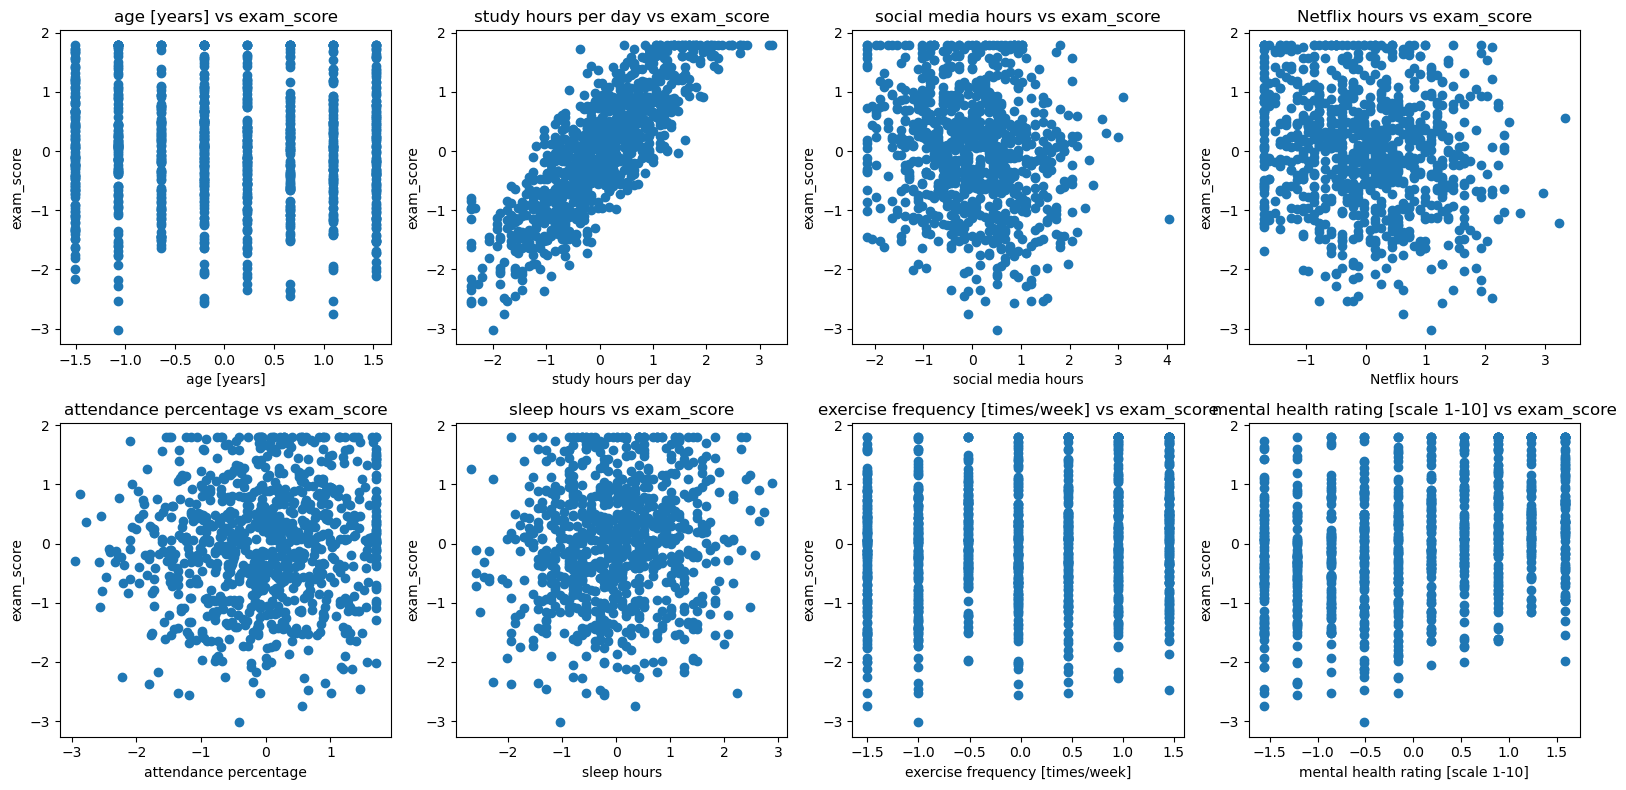

In [423]:
num_features = A.shape[1] - 1

num_cols = 4
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 4*num_rows))
axes = axes.flatten()

for i in range(num_features):
    axes[i].scatter(A[:, i+1], b)
    axes[i].set_xlabel(numeric_cols[i])
    axes[i].set_ylabel('exam_score')
    axes[i].set_title(f'{numeric_cols[i]} vs exam_score')

for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


We decided to pick the following loss function as our objective function.

<br /><br /> $$f(x) = \frac{1}{2}\|Ax - b\|^2$$<br />

In [424]:
def calculate_objective(Axmb):
    """Calculate 1/2*||Ax - b||^2 for the vector Axmb = Ax - b"""
    obj = 0.5 * (Axmb**2).sum()
    return obj

def compute_gradient(A, x, b):
    """Compute the gradient and objective function."""
    Axmb = A.dot(x) - b
    grad = A.T.dot(Axmb)
    return grad, Axmb

def gradient_descent(A, initial_x, b, max_iters, gamma, tol=1e-6):
    """Gradient descent algorithm with convergence check."""
    xs = [initial_x]
    objectives = []
    x = initial_x
    
    for n_iter in range(max_iters):
        grad, Axmb = compute_gradient(A, x, b)
        obj = calculate_objective(Axmb)
        x = x - gamma * grad
        
        xs.append(x)
        objectives.append(obj)
        
        print("Gradient Descent({bi}/{ti}): objective={l:.5f}, x={w}".format(
        bi=n_iter + 1, ti=max_iters, l=obj,
        w=np.array2string(x, precision=5, separator=", ",
                       formatter={'float_kind':lambda x: f"{x:.5f}"})))
        # Controlla convergenza
        if n_iter > 0:
            if abs(objectives[-1] - objectives[-2]) < tol:
                print()
                print(f"✅ Convergence reached after {n_iter+1} iterations.")
                break
    return objectives, xs

## Naive test


In [425]:
# Define the parameters of the algorithm.
max_iters = 300
gamma = 0.001  # gamma = 0.01 does not converge

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
gradient_objectives_naive, gradient_xs_naive = gradient_descent(A, x_initial, b, max_iters, gamma)


Gradient Descent(1/300): objective=454.50000, x=[0.00000, -0.01166, 0.74806, -0.15605, -0.15142, 0.08727, 0.11117, 0.14671,
 0.28901]
Gradient Descent(2/300): objective=50.59370, x=[-0.00000, -0.00740, 0.82309, -0.17720, -0.14577, 0.08583, 0.13966,
 0.17103, 0.32586]
Gradient Descent(3/300): objective=45.59403, x=[-0.00000, -0.00721, 0.83190, -0.17968, -0.14299, 0.08562, 0.14419,
 0.17377, 0.33086]
Gradient Descent(4/300): objective=45.51203, x=[-0.00000, -0.00724, 0.83300, -0.18003, -0.14245, 0.08562, 0.14488,
 0.17405, 0.33154]
Gradient Descent(5/300): objective=45.51051, x=[-0.00000, -0.00725, 0.83314, -0.18009, -0.14236, 0.08562, 0.14499,
 0.17408, 0.33163]
Gradient Descent(6/300): objective=45.51048, x=[-0.00000, -0.00725, 0.83316, -0.18010, -0.14234, 0.08563, 0.14500,
 0.17408, 0.33164]
Gradient Descent(7/300): objective=45.51048, x=[-0.00000, -0.00725, 0.83316, -0.18010, -0.14234, 0.08563, 0.14501,
 0.17408, 0.33164]

✅ Convergence reached after 7 iterations.


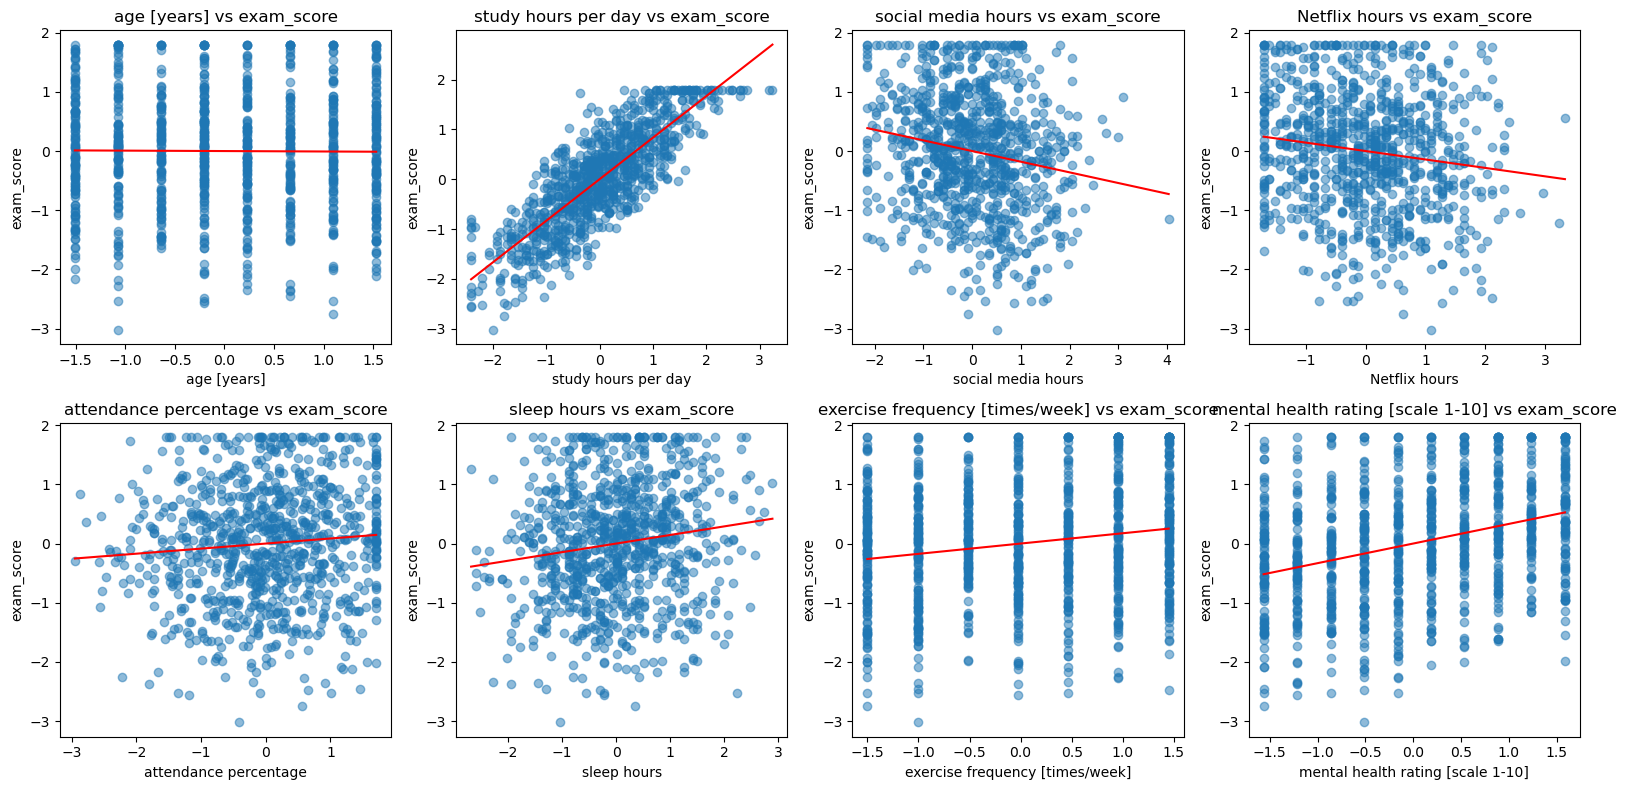

In [426]:
w_star = gradient_xs_naive[-1]  # final weight vector

num_features = A.shape[1] - 1
num_cols = 4
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 4*num_rows))
axes = axes.flatten()

for i in range(num_features):
    x_i = A[:, i+1]  # i-th standardized feature
    y = b             # standardized target
    
    axes[i].scatter(x_i, y, alpha=0.5)
    axes[i].set_xlabel(numeric_cols[i])
    axes[i].set_ylabel('exam_score')
    axes[i].set_title(f'{numeric_cols[i]} vs exam_score')
    
    # Calculate points for regression line:
    x_vals = np.array([x_i.min(), x_i.max()])
    y_vals = w_star[0] + w_star[i+1] * x_vals  # y = w0 + wi * x
    
    axes[i].plot(x_vals, y_vals, color='red')

# Remove unused axes
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Now try doing gradient descent with a better learning rate instead of a fixed $\gamma$.

# Gradient descent with smoothness constant $L$

In [427]:
# Calculate the smoothness constant for f
def calculate_L(A):
    return np.linalg.norm(A.T @ A, ord=2)
    return L

In [428]:
# Define the parameters of the algorithm.
max_iters = 10

L = calculate_L(A)
gamma_smooth = 1/L
print(L)

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
gradient_objectives_smooth, gradient_xs_smooth = gradient_descent(A, x_initial, b, max_iters, gamma_smooth)

990.2836288154625
Gradient Descent(1/10): objective=454.50000, x=[0.00000, -0.01178, 0.75540, -0.15758, -0.15291, 0.08812, 0.11226, 0.14815,
 0.29185]
Gradient Descent(2/10): objective=49.88179, x=[-0.00000, -0.00732, 0.82449, -0.17760, -0.14565, 0.08579, 0.14021,
 0.17149, 0.32655]
Gradient Descent(3/10): objective=45.57438, x=[-0.00000, -0.00720, 0.83214, -0.17975, -0.14291, 0.08561, 0.14432,
 0.17384, 0.33100]
Gradient Descent(4/10): objective=45.51154, x=[-0.00000, -0.00724, 0.83304, -0.18005, -0.14243, 0.08562, 0.14491,
 0.17406, 0.33156]
Gradient Descent(5/10): objective=45.51050, x=[-0.00000, -0.00725, 0.83315, -0.18009, -0.14235, 0.08563, 0.14499,
 0.17408, 0.33163]
Gradient Descent(6/10): objective=45.51048, x=[-0.00000, -0.00725, 0.83316, -0.18010, -0.14234, 0.08563, 0.14500,
 0.17408, 0.33164]
Gradient Descent(7/10): objective=45.51048, x=[-0.00000, -0.00725, 0.83316, -0.18010, -0.14234, 0.08563, 0.14501,
 0.17408, 0.33164]

✅ Convergence reached after 7 iterations.


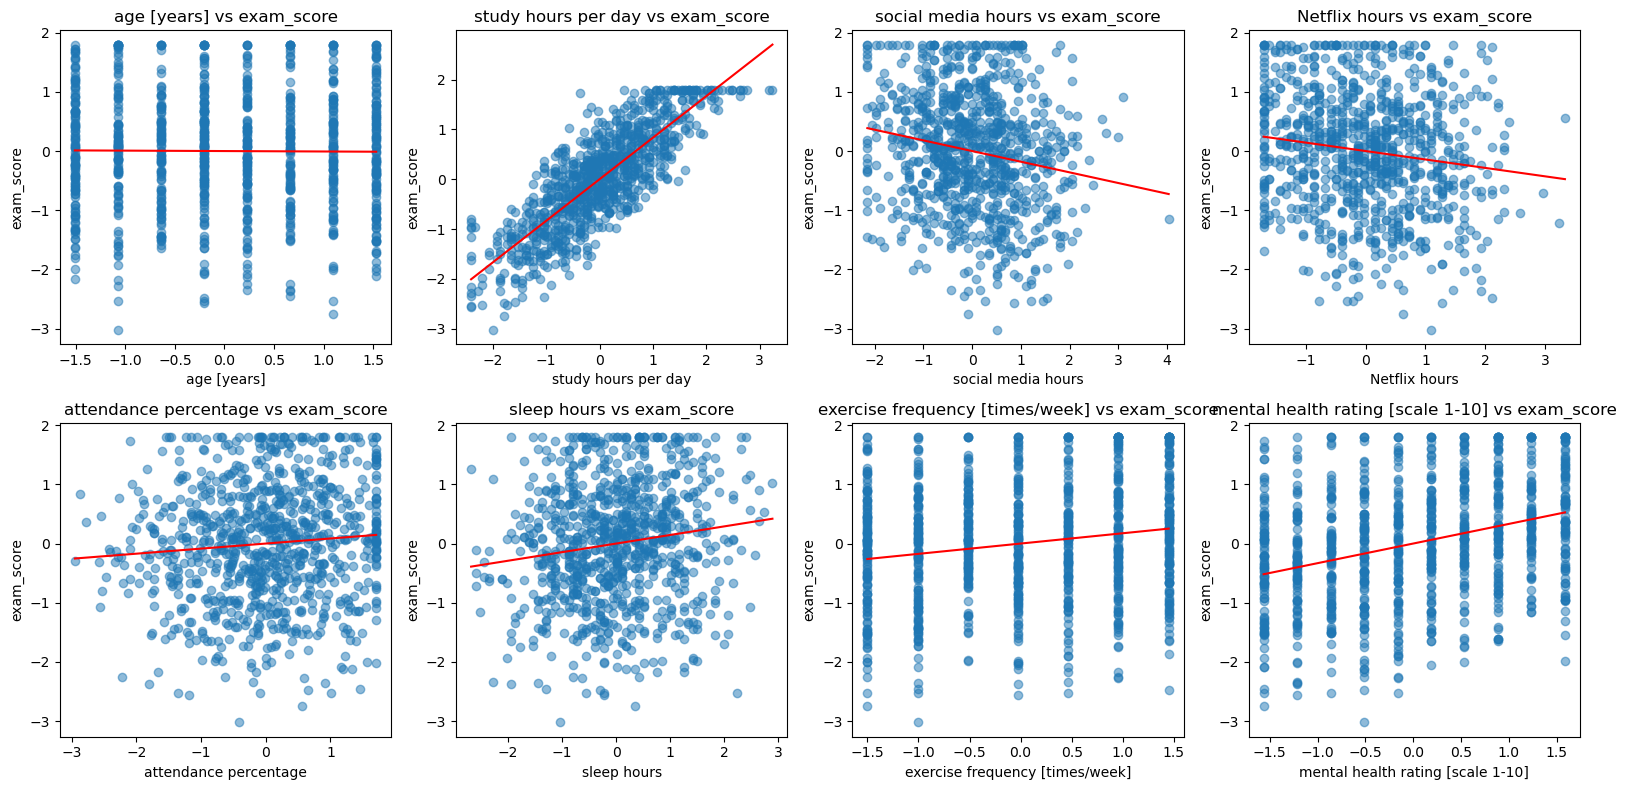

In [429]:
w_star = gradient_xs_smooth[-1]  # final weight vector

num_features = A.shape[1] - 1
num_cols = 4
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 4*num_rows))
axes = axes.flatten()

for i in range(num_features):
    x_i = A[:, i+1]  # i-th standardized feature
    y = b             # standardized target
    
    axes[i].scatter(x_i, y, alpha=0.5)
    axes[i].set_xlabel(numeric_cols[i])
    axes[i].set_ylabel('exam_score')
    axes[i].set_title(f'{numeric_cols[i]} vs exam_score')
    
    # Calculate points for regression line:
    x_vals = np.array([x_i.min(), x_i.max()])
    y_vals = w_star[0] + w_star[i+1] * x_vals  # y = w0 + wi * x
    
    axes[i].plot(x_vals, y_vals, color='red')

# Remove unused axes
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Assuming bounded gradients (Lipschitz function)

In [430]:
max_iters = 110 # Computed heuristically
R = 25 # Chosen heuristically aswell

# Compute the bound B on the gradient norm
# B calculation using spectral norm (operator 2-norm)
B = R * np.linalg.norm(A.T @ A, ord=2) + np.linalg.norm(A.T @ b)
# Using ord=2 computes the spectral norm (largest singular value),
# which is the correct Lipschitz constant of the gradient for quadratic functions.
# This provides a tight and theoretically justified upper bound on the gradient norm.

#  Compute learning rate based on bounded gradient
gamma_bounded = R/(B*np.sqrt(max_iters))

# Start gradient descent.
gradient_objectives_bounded, gradient_xs_bounded = gradient_descent(A, x_initial, b, max_iters, gamma_bounded)

Gradient Descent(1/110): objective=454.50000, x=[0.00000, -0.00109, 0.06962, -0.01452, -0.01409, 0.00812, 0.01035, 0.01365,
 0.02690]
Gradient Descent(2/110): objective=389.21469, x=[0.00000, -0.00203, 0.13341, -0.02788, -0.02682, 0.01548, 0.01998, 0.02625,
 0.05161]
Gradient Descent(3/110): objective=334.36711, x=[0.00000, -0.00286, 0.19186, -0.04016, -0.03832, 0.02213, 0.02894, 0.03786,
 0.07432]
Gradient Descent(4/110): objective=288.28579, x=[0.00000, -0.00358, 0.24541, -0.05145, -0.04871, 0.02816, 0.03727, 0.04857,
 0.09518]
Gradient Descent(5/110): objective=249.56735, x=[0.00000, -0.00420, 0.29449, -0.06183, -0.05809, 0.03362, 0.04503, 0.05845,
 0.11435]
Gradient Descent(6/110): objective=217.03348, x=[0.00000, -0.00474, 0.33946, -0.07138, -0.06655, 0.03856, 0.05224, 0.06756,
 0.13196]
Gradient Descent(7/110): objective=189.69471, x=[0.00000, -0.00521, 0.38067, -0.08015, -0.07419, 0.04303, 0.05894, 0.07595,
 0.14815]
Gradient Descent(8/110): objective=166.72016, x=[0.00000, -0.0

We realize that since the step size used is significantly smaller than the typical 1/L choice due to its dependency on 1/√max_iters. This results in slower but more stable convergence, requiring many more iterations (around 107) to reach the optimum. We recognize this trade-off between stability and speed in our approach.

Furthermore, we attempted to incorporate the theoretical formula for the minimum number of iterations required to reach a target accuracy ε = 1e-6, using the bound:

$$
T \geq \frac{B^2 R^2}{\varepsilon^2}
$$
 ​
 
However, in practice, this leads to an extremely large value for T (on the order of \( 10^{18} \)). As a consequence, the computed learning rate γ — being inversely proportional to T becomes incredibly small, resulting in practically zero updates at each step. 

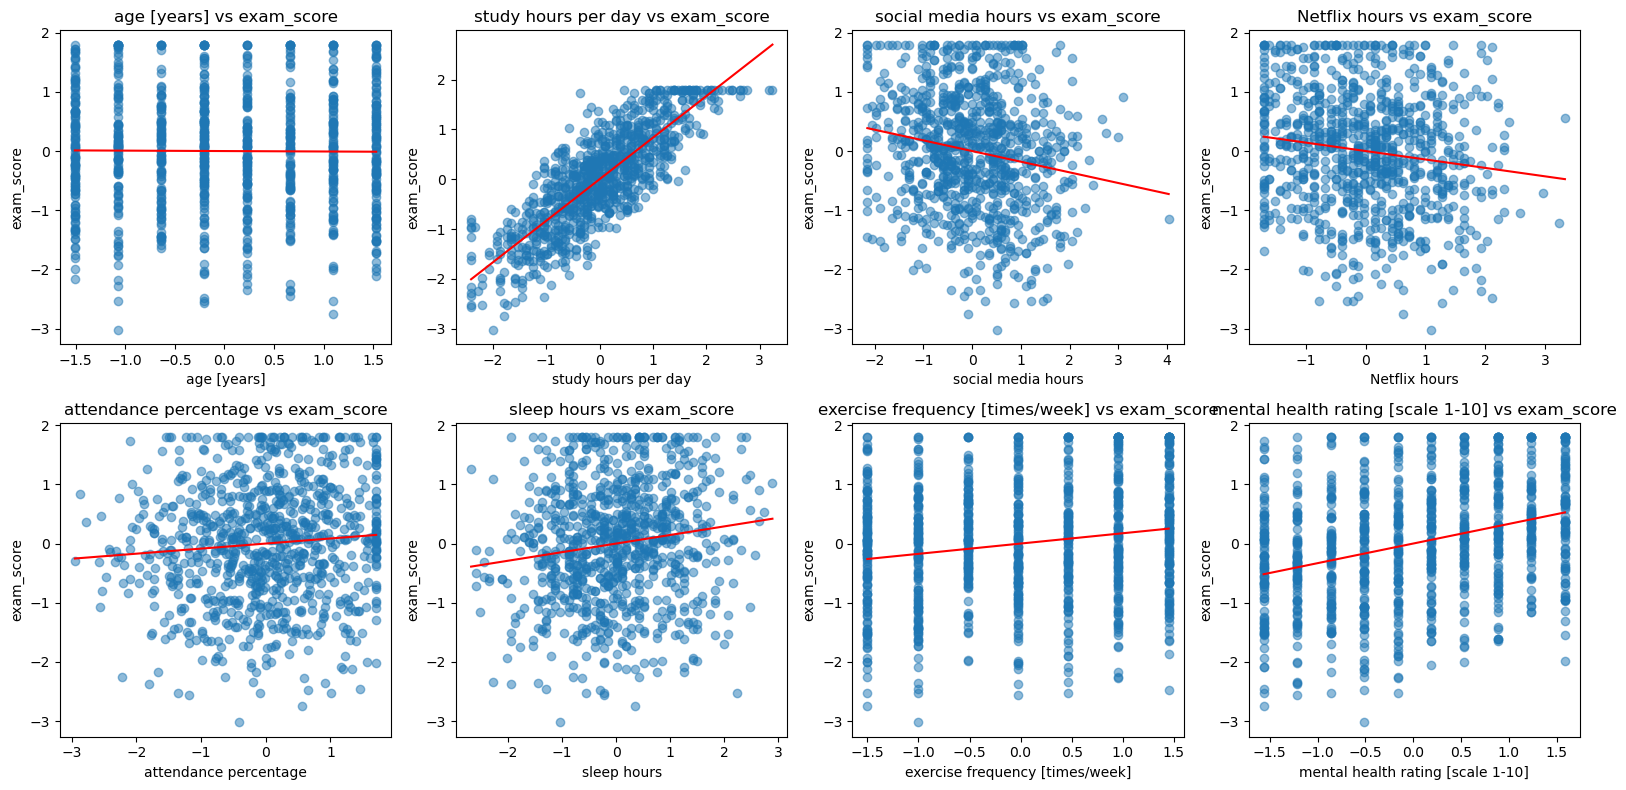

In [431]:
w_star = gradient_xs_bounded[-1]  # final weight vector

num_features = A.shape[1] - 1
num_cols = 4
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 4*num_rows))
axes = axes.flatten()

for i in range(num_features):
    x_i = A[:, i+1]  # i-th standardized feature
    y = b             # standardized target
    
    axes[i].scatter(x_i, y, alpha=0.5)
    axes[i].set_xlabel(numeric_cols[i])
    axes[i].set_ylabel('exam_score')
    axes[i].set_title(f'{numeric_cols[i]} vs exam_score')
    
    # Calculate points for regression line:
    x_vals = np.array([x_i.min(), x_i.max()])
    y_vals = w_star[0] + w_star[i+1] * x_vals  # y = w0 + wi * x
    
    axes[i].plot(x_vals, y_vals, color='red')

# Remove unused axes
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Assuming the objective function is μ-strongly convex with Lipschitz continuous gradient


In [432]:
# Calculate the strong convexity constant μ (smallest eigenvalue of AᵗA).
def calculate_mu(A):
    eigenvalues = np.linalg.eigvalsh(A.T @ A)
    return np.min(eigenvalues)

In [433]:
# Initialization
x_initial = np.zeros(A.shape[1])

# Maximum number of iterations
max_iters = 10

# Calculate smoothness and strong convexity constants
L = calculate_L(A)
mu = calculate_mu(A)

print(f"Lipschitz constant L = {L:.4f}")
print(f"Strong convexity constant mu = {mu:.4f}")

# Learning rate for strongly convex function
gamma_strong = 2 / (L + mu)
print(f"Learning rate (strongly convex) γ = {gamma_strong:.6f}")

# Start gradient descent
gradient_objectives_strong, gradient_xs_strong = gradient_descent(
    A, x_initial, b, max_iters, gamma_strong
)


Lipschitz constant L = 990.2836
Strong convexity constant mu = 829.5357
Learning rate (strongly convex) γ = 0.001099
Gradient Descent(1/10): objective=454.50000, x=[0.00000, -0.01282, 0.82213, -0.17150, -0.16641, 0.09591, 0.12217, 0.16124,
 0.31763]
Gradient Descent(2/10): objective=46.30773, x=[-0.00000, -0.00641, 0.83134, -0.18007, -0.14311, 0.08467, 0.14450,
 0.17464, 0.33068]
Gradient Descent(3/10): objective=45.51366, x=[-0.00000, -0.00729, 0.83316, -0.17999, -0.14241, 0.08568, 0.14489,
 0.17404, 0.33162]
Gradient Descent(4/10): objective=45.51050, x=[-0.00000, -0.00725, 0.83316, -0.18010, -0.14234, 0.08562, 0.14500,
 0.17409, 0.33164]
Gradient Descent(5/10): objective=45.51048, x=[-0.00000, -0.00725, 0.83316, -0.18010, -0.14234, 0.08563, 0.14501,
 0.17408, 0.33164]
Gradient Descent(6/10): objective=45.51048, x=[-0.00000, -0.00725, 0.83316, -0.18010, -0.14234, 0.08563, 0.14501,
 0.17408, 0.33164]

✅ Convergence reached after 6 iterations.


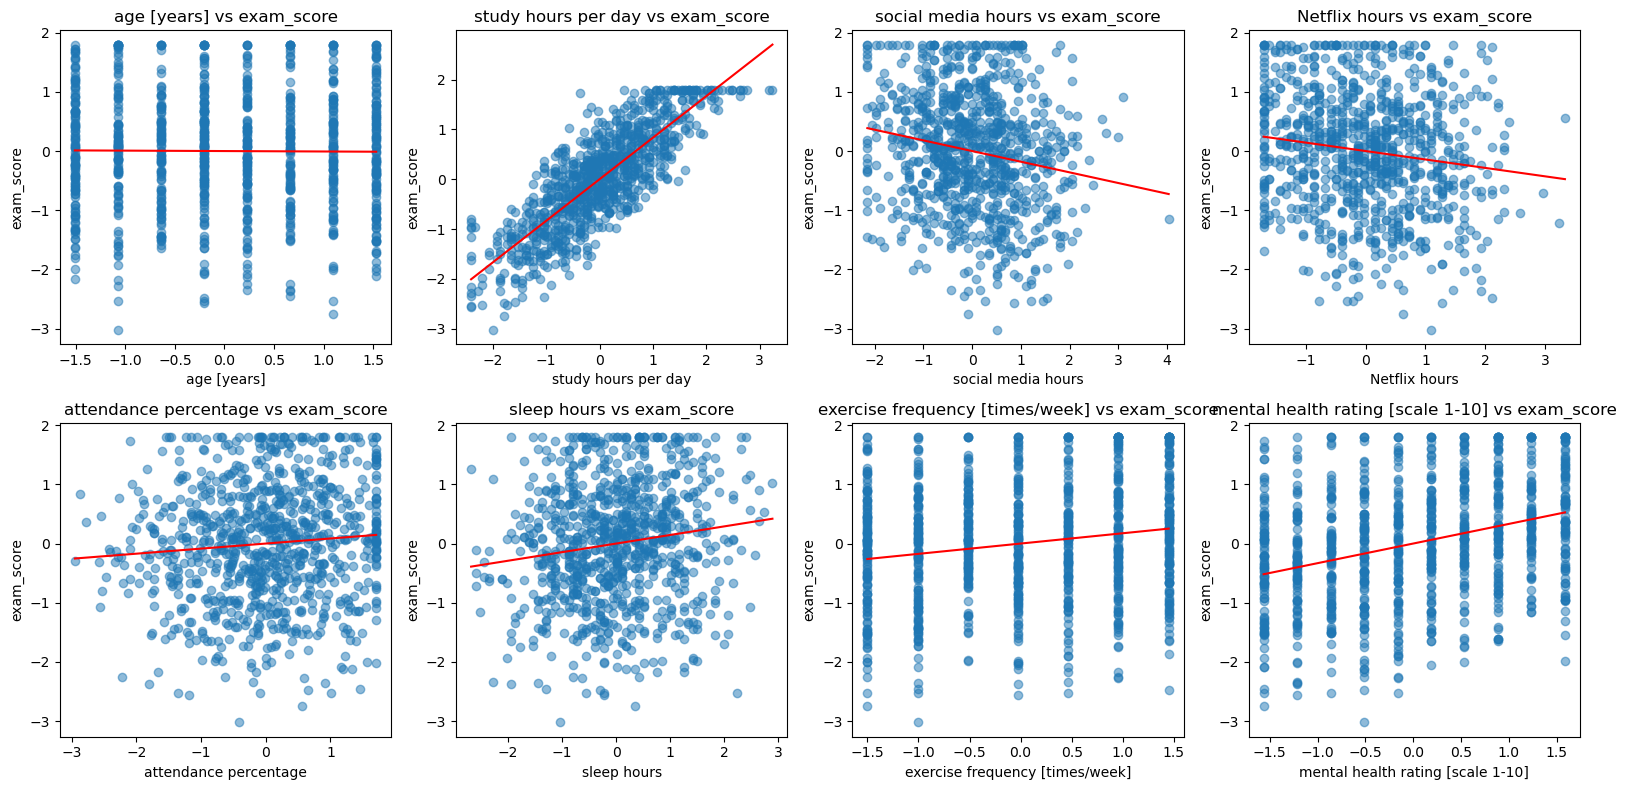

In [434]:
# Final weight vector obtained from strongly convex gradient descent
w_star = gradient_xs_strong[-1]

num_features = A.shape[1] - 1  # Exclude bias column
num_cols = 4
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 4 * num_rows))
axes = axes.flatten()

for i in range(num_features):
    x_i = A[:, i + 1]  # i-th standardized feature (skip bias column)
    y = b              # standardized target (exam score)
    
    axes[i].scatter(x_i, y, alpha=0.5)
    axes[i].set_xlabel(numeric_cols[i])
    axes[i].set_ylabel('exam_score')
    axes[i].set_title(f'{numeric_cols[i]} vs exam_score')
    
    # Compute regression line: y = w0 + wi * xi
    x_vals = np.array([x_i.min(), x_i.max()])
    y_vals = w_star[0] + w_star[i + 1] * x_vals
    
    axes[i].plot(x_vals, y_vals, color='red')

# Remove unused subplots (if any)
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Comparison

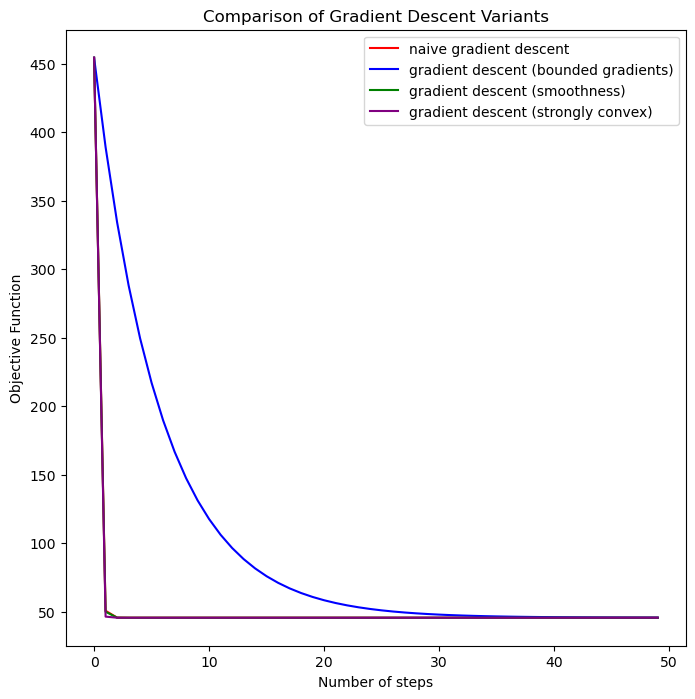

In [435]:
max_steps = 50

# Extend each list to 50 steps by repeating the last value if shorter
naive = gradient_objectives_naive + [gradient_objectives_naive[-1]] * (max_steps - len(gradient_objectives_naive)) if len(gradient_objectives_naive) < max_steps else gradient_objectives_naive[:max_steps]
bounded = gradient_objectives_bounded + [gradient_objectives_bounded[-1]] * (max_steps - len(gradient_objectives_bounded)) if len(gradient_objectives_bounded) < max_steps else gradient_objectives_bounded[:max_steps]
smooth = gradient_objectives_smooth + [gradient_objectives_smooth[-1]] * (max_steps - len(gradient_objectives_smooth)) if len(gradient_objectives_smooth) < max_steps else gradient_objectives_smooth[:max_steps]
strong = gradient_objectives_strong + [gradient_objectives_strong[-1]] * (max_steps - len(gradient_objectives_strong)) if len(gradient_objectives_strong) < max_steps else gradient_objectives_strong[:max_steps]

# Plotting
plt.figure(figsize=(8, 8))
plt.xlabel('Number of steps')
plt.ylabel('Objective Function')

plt.plot(range(max_steps), naive, 'red', label='naive gradient descent')
plt.plot(range(max_steps), bounded, 'blue', label='gradient descent (bounded gradients)')
plt.plot(range(max_steps), smooth, 'green', label='gradient descent (smoothness)')
plt.plot(range(max_steps), strong, 'purple', label='gradient descent (strongly convex)')

plt.legend(loc='upper right')
plt.title('Comparison of Gradient Descent Variants')
plt.show()


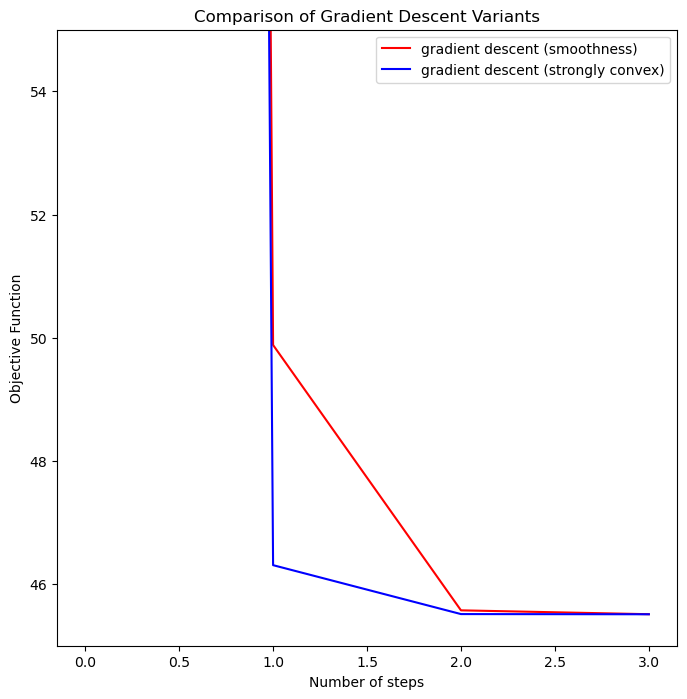

In [436]:
max_steps = 4

# Extend each list to 8 steps by repeating the last value if shorter
smooth = gradient_objectives_smooth + [gradient_objectives_smooth[-1]] * (max_steps - len(gradient_objectives_smooth)) if len(gradient_objectives_smooth) < max_steps else gradient_objectives_smooth[:max_steps]
strong = gradient_objectives_strong + [gradient_objectives_strong[-1]] * (max_steps - len(gradient_objectives_strong)) if len(gradient_objectives_strong) < max_steps else gradient_objectives_strong[:max_steps]

# Plotting
plt.figure(figsize=(8, 8))
plt.xlabel('Number of steps')
plt.ylabel('Objective Function')

plt.plot(range(max_steps), smooth, 'red', label='gradient descent (smoothness)')
plt.plot(range(max_steps), strong, 'blue', label='gradient descent (strongly convex)')

plt.ylim(45, 55)  # Set Y-axis limits
plt.legend(loc='upper right')
plt.title('Comparison of Gradient Descent Variants')
plt.show()


# Performance Comparison

We performed three tests to evaluate the execution time of the algorithm under different conditions:

- **Naive Test:** The algorithm took **7 ms** to complete.
- **Smooth Constant L Test:** By applying a smoothing constant 𝐿, the algorithm's execution time improved, completing in **4ms**.
- **bounded gradients (Lipschitz function):** By assuming bounded gradients (Lipschitz function) it complete in **55 ms**.

the naive test and the smooth constant converge in the same number of steps (7) due to the specific heuristic choice of the step size 𝛾; with any larger 𝛾 the naive test doesn't converge.


These results highlight that using the smooth constant 𝐿 approach results in a faster convergence or more efficient computation compared to the bounded gradients implementation.

# Stochastic Gradient Descent Approach

We will now try to utilize a stochastic approach, to evaluate its effectiveness in comparison to basic GD approaches

In [437]:
def objective_function(A, x, b):
    """Compute the least squares objective over the given dataset"""
    Axmb= A.dot(x) - b
    return calculate_objective(Axmb)


def stochastic_gradient(A, x, b, batch_size=1):
    # if batch_size is different than 1 then we are using a minibatch gradient
    dataset_size = len(b)
    indices = np.random.choice(dataset_size, batch_size, replace=False)
    # we pick a batch_size number of indices (rows) to compute the gradient on a smaller part of the dataset
    # replace=False means that in subsequent random picks for indices previously selected indices will not be picked again

    # we reduce the starting matrix A and vector b to the indices chosen randomly, and use the resulting data to compute the gradient
    UsedA=A[indices,:]
    UsedB=b[indices]


    Axmb=UsedA.dot(x)-UsedB
    gradient=UsedA.T.dot(Axmb)/batch_size
    return gradient


def stochastic_gradient_descent(data_A, x_zero, targets_b, batch_size, epochs, learning_rate, tol =1e-6,decreasing_learning_rate=False):
    """
    Mini-batch Stochastic Gradient Descent for Linear Least Squares problems.

    :param data_A: numpy array of size (num_examples, num_features)
    :param x_zero: starting parameters, a numpy array of size (num_features),
    :param targets_b: numpy array of size (num_examples)
    :param batch_size: size of the mini-batches
    :param max_iters: integer, number of updates to do
    :param learning_rate: float
    :param decreasing_learning_rate: if true, the learning rate should decay as 1 / t

    :return:
    - objectives, a list of loss values on the whole dataset, collected at the end of each pass over the dataset (epoch)
    - xs, a list of parameter vectors, collected at the end of each pass over the dataset
    """
    xs = [x_zero]  # parameters after each update
    x = x_zero
    objectives = [objective_function(data_A, x, targets_b)]  # list of the loss values after each update


    total_iterations = 0

    print("SGD({bi:d}/{ti:d}): objective = {l:f}, total number of iterations = {ii:d}".format(
                  bi=0, ti=epochs, l=objective_function(data_A, x, targets_b), ii=total_iterations))

    for epoch in range(epochs):

      if (len(targets_b)/batch_size) != int(len(targets_b)/batch_size):
        num_iter = int(len(targets_b)/batch_size) + 1
      else:
        num_iter = int(len(targets_b)/batch_size)

      for iteration in range(num_iter):

         grad = stochastic_gradient(data_A, x, targets_b, batch_size=batch_size)

         if decreasing_learning_rate:
             gamma = learning_rate / (total_iterations + 1)
         else:
             gamma = learning_rate

         # update x through the stochastic gradient update
         x = x - gamma * grad

         total_iterations = total_iterations + 1

         # store x and objective
         xs.append(x.copy())
         objective = objective_function(data_A, x, targets_b)
         objectives.append(objective)

      print("SGD({bi:d}/{ti:d}): objective = {l:f}, total number of iterations = {ii:d}".format(
                  bi=epoch + 1, ti=epochs, l=objective, ii=total_iterations))
      
      # Controlla convergenza
      if epoch >= 3:
        recent_changes = [abs(objectives[-i] - objectives[-i-1]) for i in range(1, 4)]
        if all(change < tol for change in recent_changes):
            print(f"✅ Convergence (stable in last 3 epochs) at epoch {epoch+1}")
            break
      
    return objectives, xs

# Naive stochastic test

First of all, let's try the method using arbitrairily chosen values.
We decided to use minibatch gr

In [438]:
# Define the parameters of the algorithm.
max_iters = 20 # epochs
gamma = 0.01   # this is totally arbitrary
batch_size = 32

# Initialization
x_initial = np.zeros(A.shape[1])

# Start SGD.
sgd_objectives, sgd_xs = stochastic_gradient_descent(A, x_initial, b, batch_size, max_iters, gamma, False)


SGD(0/20): objective = 454.500000, total number of iterations = 0
SGD(1/20): objective = 274.124828, total number of iterations = 29
SGD(2/20): objective = 177.471272, total number of iterations = 58
SGD(3/20): objective = 119.439811, total number of iterations = 87
SGD(4/20): objective = 86.813858, total number of iterations = 116
SGD(5/20): objective = 69.412353, total number of iterations = 145
SGD(6/20): objective = 58.733692, total number of iterations = 174
SGD(7/20): objective = 53.522350, total number of iterations = 203
SGD(8/20): objective = 49.913317, total number of iterations = 232
SGD(9/20): objective = 47.772539, total number of iterations = 261
SGD(10/20): objective = 46.876618, total number of iterations = 290
SGD(11/20): objective = 46.343906, total number of iterations = 319
SGD(12/20): objective = 46.172991, total number of iterations = 348
SGD(13/20): objective = 45.943155, total number of iterations = 377
SGD(14/20): objective = 45.809585, total number of iteratio

With random values and a constant stepsize, the algorithm does not reach convergence.

Let's compare the results to the optimal solution $x^* = (A^T A)^{-1} A^T b$

In [439]:
x_star = np.linalg.solve(A.T.dot(A), A.T.dot(b)) #solve A^TAx = A^Tb
best_objective = objective_function(A, x_star, b) #compute the best resulting value of the objective function (the same found by GD)
print("Best objective function value:  {best_obj}".format(best_obj=best_objective))

Best objective function value:  45.51048244912897


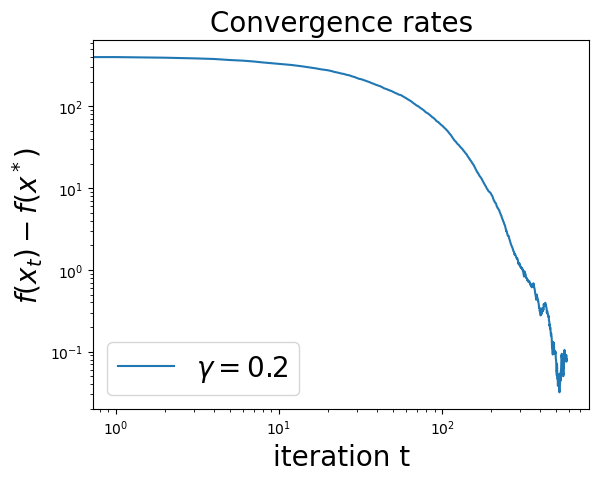

In [440]:
plt.title('Convergence rates', fontsize = 20)
plt.loglog(sgd_objectives-best_objective, label = r'$\gamma = 0.2$')
plt.xlabel('iteration t'  , fontsize = 20)
plt.ylabel(r'$f(x_t) - f(x^*)$', fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

# SGD assuming bounded stochastic gradients

Let's assume we are moving in a bounded region $\|x\| \leq R$ containing all iterates (and we assume $\|x_0-x^\star\| \leq R$ as well, for simplicity). As we did previously, we consider $R = 25$

As the objective function is the same as seen in the basic Gradient Descent, we assume the gradient to be bounded by the same Lipschitz constant B we computed previously.

In [441]:
epochs=20
R=25
B = R * np.linalg.norm(A.T @ A, ord=2) + np.linalg.norm(A.T @ b)
gammaSGD = R/(B*np.sqrt(epochs*len(b)/batch_size))
print("Computed B:  {b}".format(b=B))
print("Computed learning rate γ:  {gamma}".format(gamma=gammaSGD))

Computed B:  25612.681864305458
Computed learning rate γ:  4.09508577861049e-05


In [442]:
# Initialization
x_initial = np.zeros(A.shape[1])

# Start SGD.
sgd_objectives_dec_gamma, sgd_xs_dec_gamma = stochastic_gradient_descent(A, x_initial, b, batch_size, epochs, gamma)

SGD(0/20): objective = 454.500000, total number of iterations = 0
SGD(1/20): objective = 275.373608, total number of iterations = 29
SGD(2/20): objective = 178.441960, total number of iterations = 58
SGD(3/20): objective = 120.299684, total number of iterations = 87
SGD(4/20): objective = 86.737429, total number of iterations = 116
SGD(5/20): objective = 69.283150, total number of iterations = 145
SGD(6/20): objective = 58.743393, total number of iterations = 174
SGD(7/20): objective = 53.083063, total number of iterations = 203
SGD(8/20): objective = 49.890972, total number of iterations = 232
SGD(9/20): objective = 47.917086, total number of iterations = 261
SGD(10/20): objective = 46.894502, total number of iterations = 290
SGD(11/20): objective = 46.522359, total number of iterations = 319
SGD(12/20): objective = 46.130331, total number of iterations = 348
SGD(13/20): objective = 45.963134, total number of iterations = 377
SGD(14/20): objective = 45.708075, total number of iteratio

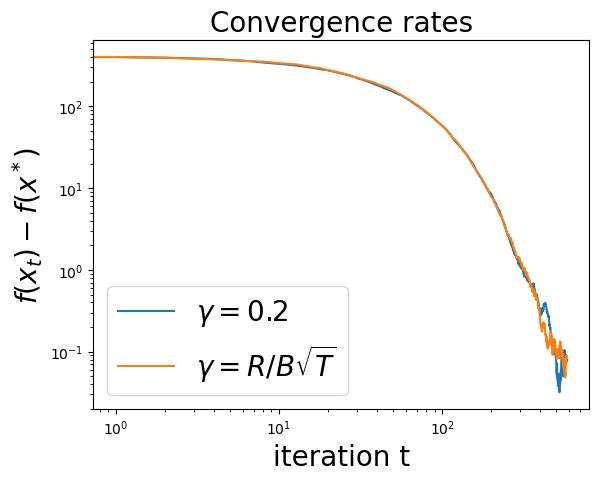

In [443]:
# Plot the convergence again
plt.title('Convergence rates', fontsize = 20)
plt.loglog(sgd_objectives - best_objective, label = r'$\gamma = 0.2$')
plt.loglog(sgd_objectives_dec_gamma - best_objective, label = r'$\gamma = R / B \sqrt{T}$')
plt.xlabel('iteration t'  , fontsize = 20)
plt.ylabel(r'$f(x_t) - f(x^*)$', fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

## SGD using strong convexity
Now try doing SGD with a better learning rate using the fact that the objective function is $\mu$-strongly convex. We recall that in this case, the learning rate to use is $\gamma_t = \frac{2}{\mu(t+1)}$, and it decays over each iteration. 
We have already computed mu before, so we can start using the SGD function with a decreasing learning rate:

In [444]:
mu = calculate_mu(A)
print(mu)
gamma0 = 2 / mu
print(gamma)
batch_size = 32

# Initialization
x_initial = np.zeros(A.shape[1])

# Start SGD.

sgd_objectives_dec_gamma_mu, sgd_xs_dec_gamma_mu = stochastic_gradient_descent(
    A, x_initial, b, batch_size, epochs, gamma0, decreasing_learning_rate=True)


829.5356560124593
0.01
SGD(0/20): objective = 454.500000, total number of iterations = 0
SGD(1/20): objective = 447.754780, total number of iterations = 29
SGD(2/20): objective = 446.395179, total number of iterations = 58
SGD(3/20): objective = 445.642607, total number of iterations = 87
SGD(4/20): objective = 445.085478, total number of iterations = 116
SGD(5/20): objective = 444.662132, total number of iterations = 145
SGD(6/20): objective = 444.331732, total number of iterations = 174
SGD(7/20): objective = 444.035782, total number of iterations = 203
SGD(8/20): objective = 443.801382, total number of iterations = 232
SGD(9/20): objective = 443.568896, total number of iterations = 261
SGD(10/20): objective = 443.377682, total number of iterations = 290
SGD(11/20): objective = 443.196522, total number of iterations = 319
SGD(12/20): objective = 443.039102, total number of iterations = 348
SGD(13/20): objective = 442.883096, total number of iterations = 377
SGD(14/20): objective = 44

## ADAGRAD

In [445]:
def ADAGRAD(A, initial_x, b, batch_size, epochs, gamma):

    xs = [initial_x]
    x = initial_x
    objectives = [objective_function(A, x, b)]
    sizes = A.shape
    n_regressors = sizes[1]
    G = np.zeros(n_regressors)

    total_iterations = 0

    print("ADAGRAD({bi:d}/{ti:d}): objective = {l:f}, total number of iterations = {ii:d}".format(
                  bi=0, ti=epochs, l=objective_function(A, x, b), ii=total_iterations))

    for epoch in range(epochs):

      if (len(b)/batch_size) != int(len(b)/batch_size):
        num_iter = int(len(b)/batch_size) + 1
      else:
        num_iter = int(len(b)/batch_size)

      for iteration in range(num_iter):

         grad = stochastic_gradient(A, x, b, batch_size=batch_size)

         G = G + np.diag(grad**2)
         G = np.sqrt(G)
         Ginv = np.linalg.inv(G)
         x = x - gamma*Ginv.dot(grad)

         total_iterations = total_iterations + 1
         # store x and objective
         xs.append(x.copy())
         objective = objective_function(A, x, b)
         objectives.append(objective)

      print("ADAGRAD({bi:d}/{ti:d}): objective = {l:f}, total number of iterations = {ii:d}".format(
                  bi=epoch + 1, ti=epochs, l=objective, ii=total_iterations))

    return objectives, xs

# Running ADAGRAD

In [446]:
init_x = np.zeros(A.shape[1])
max_iters = 100
batch_size = 32

gamma = 0.001

ADAGRAD_objective, ADAGRAD_xs = ADAGRAD(A, init_x, b, batch_size, max_iters, gamma)

ADAGRAD(0/100): objective = 454.500000, total number of iterations = 0
ADAGRAD(1/100): objective = 436.384733, total number of iterations = 29
ADAGRAD(2/100): objective = 419.978621, total number of iterations = 58
ADAGRAD(3/100): objective = 404.394630, total number of iterations = 87
ADAGRAD(4/100): objective = 390.058164, total number of iterations = 116
ADAGRAD(5/100): objective = 375.439726, total number of iterations = 145
ADAGRAD(6/100): objective = 361.386663, total number of iterations = 174
ADAGRAD(7/100): objective = 348.448863, total number of iterations = 203
ADAGRAD(8/100): objective = 335.538906, total number of iterations = 232
ADAGRAD(9/100): objective = 323.283146, total number of iterations = 261
ADAGRAD(10/100): objective = 311.076260, total number of iterations = 290
ADAGRAD(11/100): objective = 299.908871, total number of iterations = 319
ADAGRAD(12/100): objective = 288.600270, total number of iterations = 348
ADAGRAD(13/100): objective = 277.696978, total number

## ADAM

In [447]:
def ADAM(A, initial_x, b, batch_size, epochs, gamma, beta1, beta2):

    xs = [initial_x]
    x = initial_x
    objectives = [objective_function(A, x, b)]

    m = initial_x
    v = initial_x

    total_iterations = 0

    print("ADAM({bi:d}/{ti:d}): objective = {l:f}, total number of iterations = {ii:d}".format(
                  bi=0, ti=epochs, l=objective_function(A, x, b), ii=total_iterations))

    for epoch in range(epochs):

      if (len(b)/batch_size) != int(len(b)/batch_size):
        num_iter = int(len(b)/batch_size) + 1
      else:
        num_iter = int(len(b)/batch_size)

      for iteration in range(num_iter):

         grad = stochastic_gradient(A, x, b, batch_size=batch_size)

         m = beta1*m + (1-beta1)*grad
         v = beta2*v + (1-beta2)*grad**2
         v_diag = np.diag(v)
         rad_v = np.sqrt(v_diag)
         vinv = np.linalg.inv(rad_v)
         x = x - gamma*vinv.dot(m)

         total_iterations = total_iterations + 1
         # store x and objective
         xs.append(x.copy())
         objective = objective_function(A, x, b)
         objectives.append(objective)

      print("ADAM({bi:d}/{ti:d}): objective = {l:f}, total number of iterations = {ii:d}".format(
                  bi=epoch + 1, ti=epochs, l=objective, ii=total_iterations))

    return objectives, xs


# Running ADAM

In [448]:
init_x = np.zeros(A.shape[1])
max_iters = 100
batch_size = 32

gamma = 0.001
beta1 = 0.9
beta2 = 0.999
# values of gamma, beta1, beta2 commonly used, for example by keras

ADAM_objective, ADAM_xs = ADAM(A, init_x, b, batch_size, max_iters, gamma, beta1, beta2)

ADAM(0/100): objective = 454.500000, total number of iterations = 0
ADAM(1/100): objective = 272.316460, total number of iterations = 29
ADAM(2/100): objective = 189.094495, total number of iterations = 58
ADAM(3/100): objective = 145.508439, total number of iterations = 87
ADAM(4/100): objective = 117.726422, total number of iterations = 116
ADAM(5/100): objective = 98.507061, total number of iterations = 145
ADAM(6/100): objective = 85.280269, total number of iterations = 174
ADAM(7/100): objective = 75.584105, total number of iterations = 203
ADAM(8/100): objective = 68.470343, total number of iterations = 232
ADAM(9/100): objective = 62.569087, total number of iterations = 261
ADAM(10/100): objective = 58.691457, total number of iterations = 290
ADAM(11/100): objective = 55.510121, total number of iterations = 319
ADAM(12/100): objective = 53.108328, total number of iterations = 348
ADAM(13/100): objective = 51.263470, total number of iterations = 377
ADAM(14/100): objective = 49.8

### PLOT: Minibatch Gradient Descent + ADAGRAD + ADAM

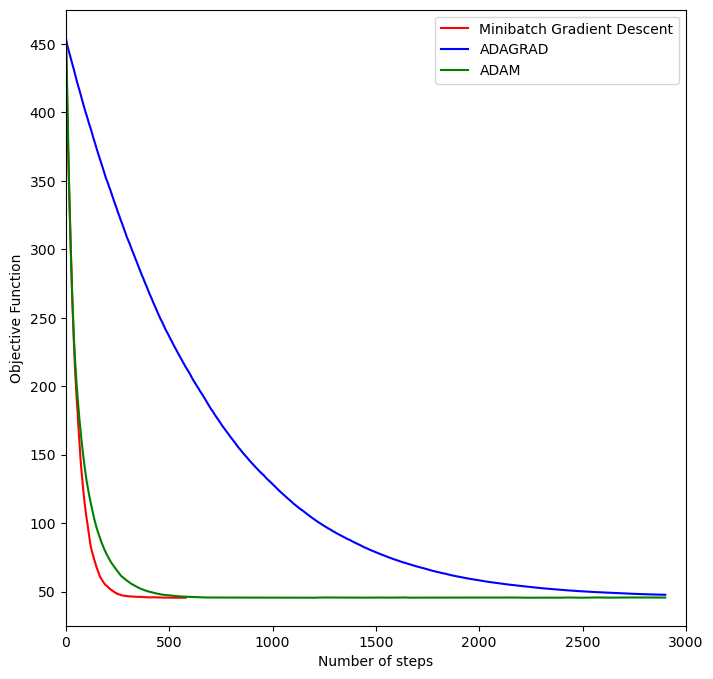

In [449]:
plt.figure(figsize=(8, 8))
plt.xlabel('Number of steps')
plt.ylabel('Objective Function')

plt.plot(range(len(sgd_objectives)), sgd_objectives,'red', label='Minibatch Gradient Descent')
plt.plot(range(len(ADAGRAD_objective)), ADAGRAD_objective,'blue', label='ADAGRAD')
plt.plot(range(len(ADAM_objective)), ADAM_objective,'green', label='ADAM')
plt.xlim(0,3000)
plt.legend(loc='upper right')
plt.show()